<a href="https://colab.research.google.com/github/game-sys/IADS_Transfer_Learning/blob/main/2_Transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# models
import cv2
from sklearn.model_selection import train_test_split
from keras.models import Sequential
import tensorflow
from keras.applications import MobileNet
from keras.applications import ResNet50
from keras.layers import Dense, Flatten
from keras.utils import to_categorical
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from keras.callbacks import ModelCheckpoint, EarlyStopping
import sklearn.metrics as metrics
import random
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint, TensorBoard

In [ ]:

os.environ['KAGGLE_USERNAME'] = "mohsin525" # username from the json file
os.environ['KAGGLE_KEY'] = "0354188f768ecafd675cd5409ca85604" # key from the json file
!kaggle competitions download -c dogs-vs-cats # api copied from kaggle (https://www.kaggle.com/c/dogs-vs-cats/data)

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
from zipfile import ZipFile
file_name = "/content/dogs-vs-cats.zip"
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('All Files Extracted !')





All Files Extracted !


In [ ]:
from zipfile import ZipFile
file_name = "/content/train.zip"
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('All Files Extracted !')


All Files Extracted !


In [ ]:
# Get all the paths
data_dir_list = os.listdir('/content/train')
#print(data_dir_list)
path, dirs, files = next(os.walk("/content/train"))
file_count = len(files)
print(file_count)

25000


In [ ]:
import os
import shutil
data_dir = '/content/'
categories = ['cat', 'dog']


for category in categories:
    category_dir = os.path.join(data_dir, category)
    print(category_dir)
    os.makedirs(category_dir, exist_ok=True)

/content/cat
/content/dog


In [ ]:
data_dir = '/content/'
train_dir = '/content/train'
count=0
for category in categories:
    category_dir = os.path.join(data_dir, category)
    label = categories.index(category)

    for img_file in os.listdir(train_dir):
        if img_file.startswith(category):
          src_path = os.path.join(train_dir, img_file)
          dst_path = os.path.join(category_dir, img_file)
          if not os.path.exists(dst_path):
              shutil.copy(src_path, dst_path)
              count+=1
        else:
          print(f"File '{img_file}' already exists in '{category}' folder. Skipping.")

print(f'Copied {count} files')

Streaming output truncated to the last 5000 lines.
File 'cat.7914.jpg' already exists in 'dog' folder. Skipping.
File 'cat.10983.jpg' already exists in 'dog' folder. Skipping.
File 'cat.9284.jpg' already exists in 'dog' folder. Skipping.
File 'cat.1045.jpg' already exists in 'dog' folder. Skipping.
File 'cat.5310.jpg' already exists in 'dog' folder. Skipping.
File 'cat.6151.jpg' already exists in 'dog' folder. Skipping.
File 'cat.11703.jpg' already exists in 'dog' folder. Skipping.
File 'cat.8258.jpg' already exists in 'dog' folder. Skipping.
File 'cat.4074.jpg' already exists in 'dog' folder. Skipping.
File 'cat.12491.jpg' already exists in 'dog' folder. Skipping.
File 'cat.5193.jpg' already exists in 'dog' folder. Skipping.
File 'cat.10939.jpg' already exists in 'dog' folder. Skipping.
File 'cat.10761.jpg' already exists in 'dog' folder. Skipping.
File 'cat.3942.jpg' already exists in 'dog' folder. Skipping.
File 'cat.5371.jpg' already exists in 'dog' folder. Skipping.
File 'cat.9103

In [ ]:
path, dirs, files = next(os.walk("/content/cat"))
file_count = len(files)
print(file_count)

path, dirs, files = next(os.walk("/content/dog"))
file_count = len(files)
print(file_count)

12500
12500


In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

data_dir = '/content/'
categories = ['cat', 'dog']
IMG_SIZE=80
image_size = (IMG_SIZE, IMG_SIZE)  # Set the desired image size (width, height).

images = []
labels = []

# Load the images and labels
for category in categories:
    category_dir = os.path.join(data_dir, category)
    label = categories.index(category)

    for img_file in os.listdir(category_dir):
        img_path = os.path.join(category_dir, img_file)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        img = cv2.resize(img, image_size)
        images.append(img)
        labels.append(label)

# Convert lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Perform data splitting: 70% train, 20% test, 10% validation
X_train, X_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.33, random_state=42)

# Print the shapes of the datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("X_val shape:", X_val.shape)

print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
print("y_val shape:", y_val.shape)


X_train shape: (17500, 80, 80, 3)
X_test shape: (5025, 80, 80, 3)
X_val shape: (2475, 80, 80, 3)
y_train shape: (17500,)
y_test shape: (5025,)
y_val shape: (2475,)


In [ ]:
# One-hot encode the labels
num_classes = 2  # For binary classification (cat and dog).
y_train_one_hot = to_categorical(y_train, num_classes)
y_test_one_hot = to_categorical(y_test, num_classes)
y_val_one_hot = to_categorical(y_val, num_classes)

# Motivation
![https://miro.medium.com/max/441/1*TIMA09tVqZe7tA6DckoP6g.png](https://miro.medium.com/max/441/1*TIMA09tVqZe7tA6DckoP6g.png)


<font size="4"> Humans have an inherent ability to transfer knowledge across tasks. What we acquire as knowledge while learning about one task, we utilize in the same way to solve related tasks. The more related the tasks, the easier it is for us to transfer, or cross-utilize our knowledge. We don’t learn everything from scratch when we attempt to learn new aspects or topics. We transfer and leverage our knowledge from what we have learnt in the past!</font>

In [ ]:
def ResNET50():
    print("Loading ResNet50 Model...")
    model = Sequential()
    model.add(ResNet50(include_top=False,weights='imagenet', pooling='avg', input_shape=(80,80,3)))
    #model.add(Flatten())
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='categorical_crossentropy',
                  optimizer='sgd',
                  metrics=['accuracy'])
    model.summary()
    return model

In [ ]:
import matplotlib.pyplot as plt
model=ResNET50()

# Define the paths for saving the model and TensorBoard logs
model_name = "ResNet50_CatvsDog"
model_dir = "models"
tensorboard_logs = "logs"

print("Starting Training... ")



# Train the model using the one-hot encoded labels and store the history
history = model.fit(X_train, y_train_one_hot, epochs=5, batch_size=128, validation_data=(X_val, y_val_one_hot),
                    callbacks=[ModelCheckpoint(os.path.join(model_dir, model_name + ".h5"),
                                               save_best_only=True)])





Loading ResNet50 Model...
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense (Dense)               (None, 2)                 4098      
                                                                 
Total params: 23,591,810
Trainable params: 23,538,690
Non-trainable params: 53,120
_________________________________________________________________
Starting Training... 
Epoch 1/5
137/137 [==============================] - 62s 254ms/step - loss: 0.3873 - accuracy: 0.8232 - val_loss: 0.3146 - val_accuracy: 0.8869
Epoch 2/5
137/137 [==============================] - 30s 221ms/step - loss: 0.1173 - accuracy: 0.9595 - val_loss: 0.2751 - val_accuracy: 0.8958
Epoch 3/5
137/137 [==============================] - 31s 225ms/step - loss: 0.0497 - accuracy: 0.98

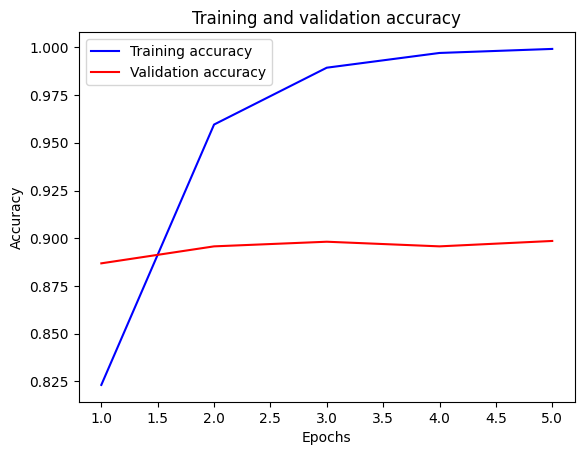

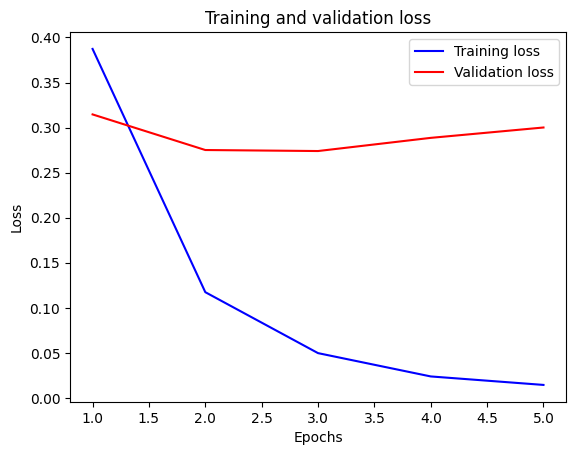

In [ ]:
# Plot training and validation accuracy on the same plot
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss on the same plot
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
from keras.models import load_model

# Load the saved model
saved_model_path = "models/ResNet50_CatvsDog.h5"
loaded_model = load_model(saved_model_path)

# Evaluate the model on the test data
loss, accuracy = loaded_model.evaluate(X_test, y_test_one_hot, batch_size=128)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

40/40 [==============================] - 4s 75ms/step - loss: 0.2696 - accuracy: 0.9053
Test Loss: 0.26962146162986755
Test Accuracy: 0.9052736163139343


In [ ]:
def MobileNet_model():
    print("Loading MobileNet Model...")
    model = Sequential()
    model.add(MobileNet(include_top=False,weights='imagenet', pooling='avg', input_shape=(80,80,3)))
    #model.add(Flatten())
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='categorical_crossentropy',
                  optimizer='Adam',
                  metrics=['accuracy'])
    model.summary()
    return model

In [ ]:
model=MobileNet_model()

Loading MobileNet Model...
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 1024)             3228864   
 nal)                                                            
                                                                 
 dense_1 (Dense)             (None, 2)                 2050      
                                                                 
Total params: 3,230,914
Trainable params: 3,209,026
Non-trainable params: 21,888
_________________________________________________________________


In [ ]:

# Define the paths for saving the model and TensorBoard logs
model_name = "MobileNet_CatvsDog"
model_dir = "models"
tensorboard_logs = "logs"

print("Starting Training... ")

# Train the model using the one-hot encoded labels
history = model.fit(X_train, y_train_one_hot, epochs=5, batch_size=128, validation_data=(X_val, y_val_one_hot),
                    callbacks=[ModelCheckpoint(os.path.join(model_dir, model_name + ".h5"),
                                               save_best_only=True,
                                               )])


Starting Training... 
Epoch 1/5
137/137 [==============================] - 11s 81ms/step - loss: 0.0383 - accuracy: 0.9865 - val_loss: 0.2718 - val_accuracy: 0.9317
Epoch 2/5
137/137 [==============================] - 10s 76ms/step - loss: 0.0320 - accuracy: 0.9884 - val_loss: 0.2750 - val_accuracy: 0.9301
Epoch 3/5
137/137 [==============================] - 11s 77ms/step - loss: 0.0363 - accuracy: 0.9873 - val_loss: 0.7318 - val_accuracy: 0.8695
Epoch 4/5
137/137 [==============================] - 10s 75ms/step - loss: 0.0310 - accuracy: 0.9889 - val_loss: 0.3238 - val_accuracy: 0.9220
Epoch 5/5
137/137 [==============================] - 10s 76ms/step - loss: 0.0263 - accuracy: 0.9908 - val_loss: 0.3144 - val_accuracy: 0.9180


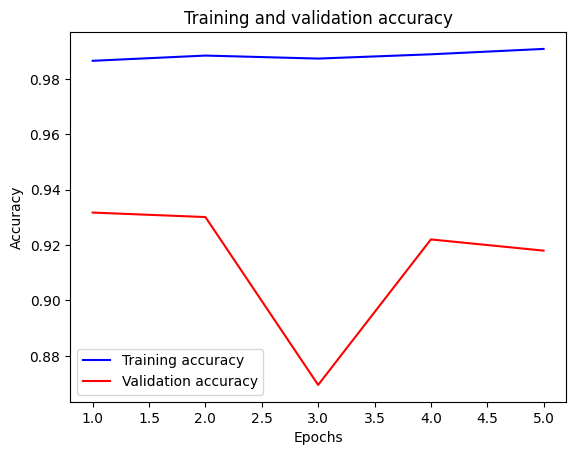

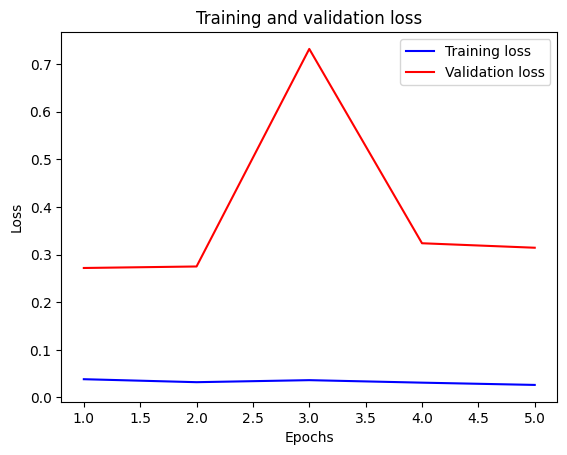

In [ ]:
# Plot training and validation accuracy on the same plot
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss on the same plot
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
from keras.models import load_model

# Load the saved model
saved_model_path = "models/MobileNet_CatvsDog.h5"
loaded_model = load_model(saved_model_path)

# Evaluate the model on the test data
loss, accuracy = loaded_model.evaluate(X_test, y_test_one_hot, batch_size=128)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

40/40 [==============================] - 1s 21ms/step - loss: 0.2398 - accuracy: 0.9365
Test Loss: 0.2398119568824768
Test Accuracy: 0.9365174174308777
